### Initial Data Prep and Exploration

In [1]:
import pandas as pd
import numpy as np
import pyrsm as rsm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
v_df = pd.read_csv("vestiaire.csv")

In [3]:
v_df.shape

(900514, 36)

There are 900,514 rows and 36 columns in this dataset. 

In [4]:
v_df.columns

Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [5]:
v_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [6]:
v1 = v_df.copy()
float((v1.isna().mean() * 100).sum())

20.50850958452617

In [7]:
# We see that 20.5% of the data is missing.

In [8]:
v1.isna().mean() * 100
# usually ships within has the highest amount of missing values. We will replace these missing values with the most common values.

product_id                     0.000000
product_type                   0.000000
product_name                   0.000000
product_description            0.000777
product_keywords               0.131369
product_gender_target          0.000000
product_category               0.131369
product_season                 0.000222
product_condition              0.000000
product_like_count             0.000000
sold                           0.000000
reserved                       0.000000
available                      0.000000
in_stock                       0.000000
should_be_gone                 0.000000
brand_id                       0.000000
brand_name                     0.000000
brand_url                      0.000000
product_material               0.000444
product_color                  0.000111
price_usd                      0.000000
seller_price                   0.000000
seller_earning                 0.000000
seller_badge                   0.000000
has_cross_border_fees          1.525351


In [9]:
v1["usually_ships_within"] = v1["usually_ships_within"].fillna(
    v1["usually_ships_within"].mode()[0]
)
v1["product_category"] = v1["product_category"].fillna(v1["product_category"].mode()[0])
v1["product_keywords"] = v1["product_keywords"].fillna(v1["product_keywords"].mode()[0])

# Filling missing values with the median for numerical columns
v1["buyers_fees"] = v1["buyers_fees"].fillna(v1["buyers_fees"].median())

In [10]:
v1[["has_cross_border_fees"]].value_counts()
# All values are True, so we will fill in any columns with False

has_cross_border_fees
True                     886778
Name: count, dtype: int64

In [11]:
v1["has_cross_border_fees"].fillna(False, inplace=True)

/tmp/ipykernel_73596/3402261988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  v1["has_cross_border_fees"].fillna(False, inplace=True)
/tmp/ipykernel_73596/3402261988.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  v1["has_cross_border_fees"].fillna(False, inplace=True)


In [12]:
print(f"Percentage of missing values: {(v1.isna().mean().mean() * 100).round(4)}")


Percentage of missing values: 0.0002


In [13]:
v1.dropna(inplace=True)

In [14]:
print(f"Percentage of missing values: {(v1.isna().mean() * 100).sum()}")


Percentage of missing values: 0.0


In [15]:
v1.shape

(900461, 36)

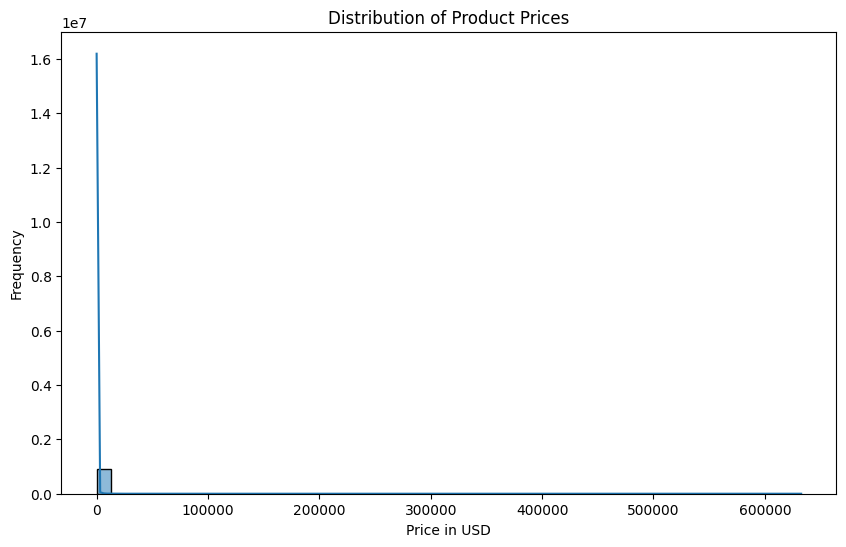

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(v1["price_usd"], bins=50, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price in USD")
plt.ylabel("Frequency")
plt.show()


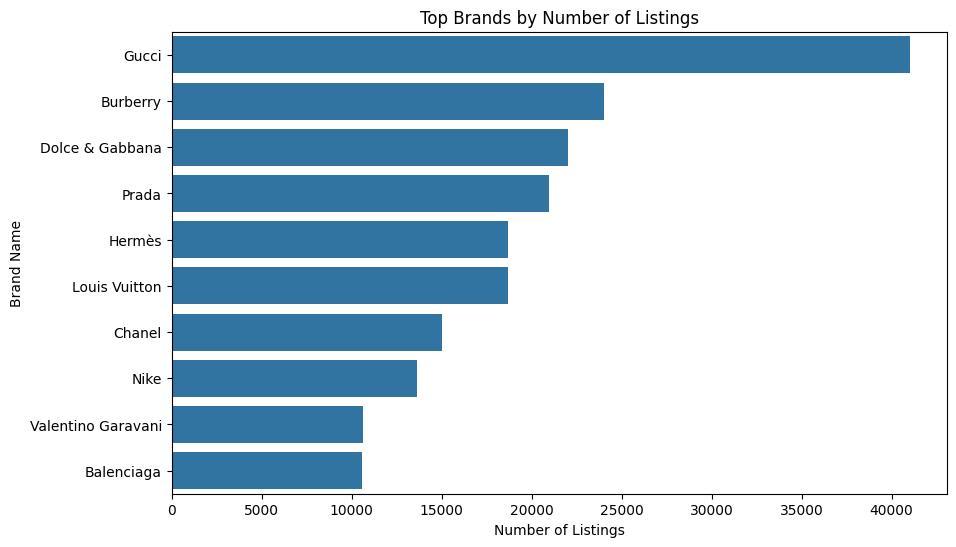

In [17]:
top_brands = v1["brand_name"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top Brands by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Brand Name")
plt.show()

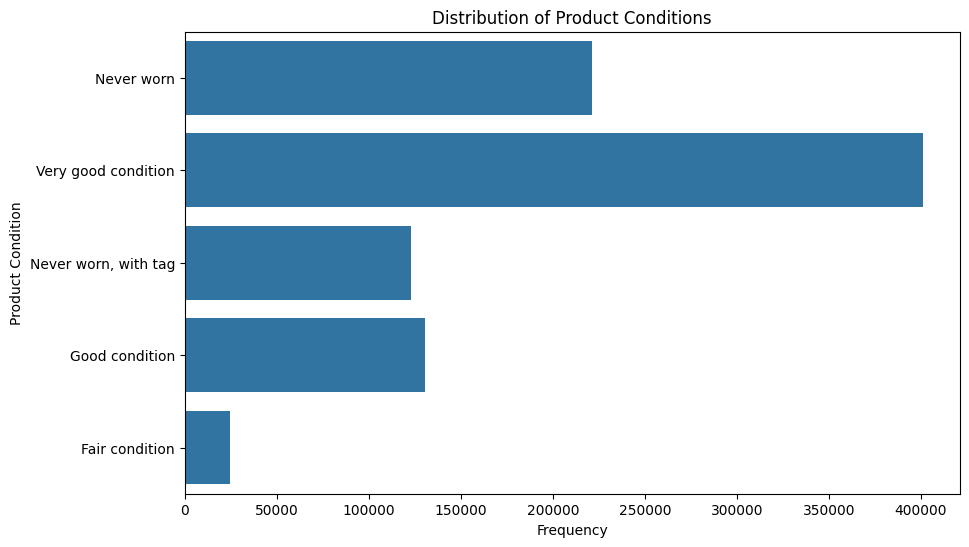

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(y="product_condition", data=v1)
plt.title("Distribution of Product Conditions")
plt.xlabel("Frequency")
plt.ylabel("Product Condition")
plt.show()


In [19]:
v1["seller_country"]

0                Germany
1                Belgium
2                  Spain
3          United States
4         United Kingdom
               ...      
900509             Italy
900510           Austria
900511            France
900512             Italy
900513           Romania
Name: seller_country, Length: 900461, dtype: object

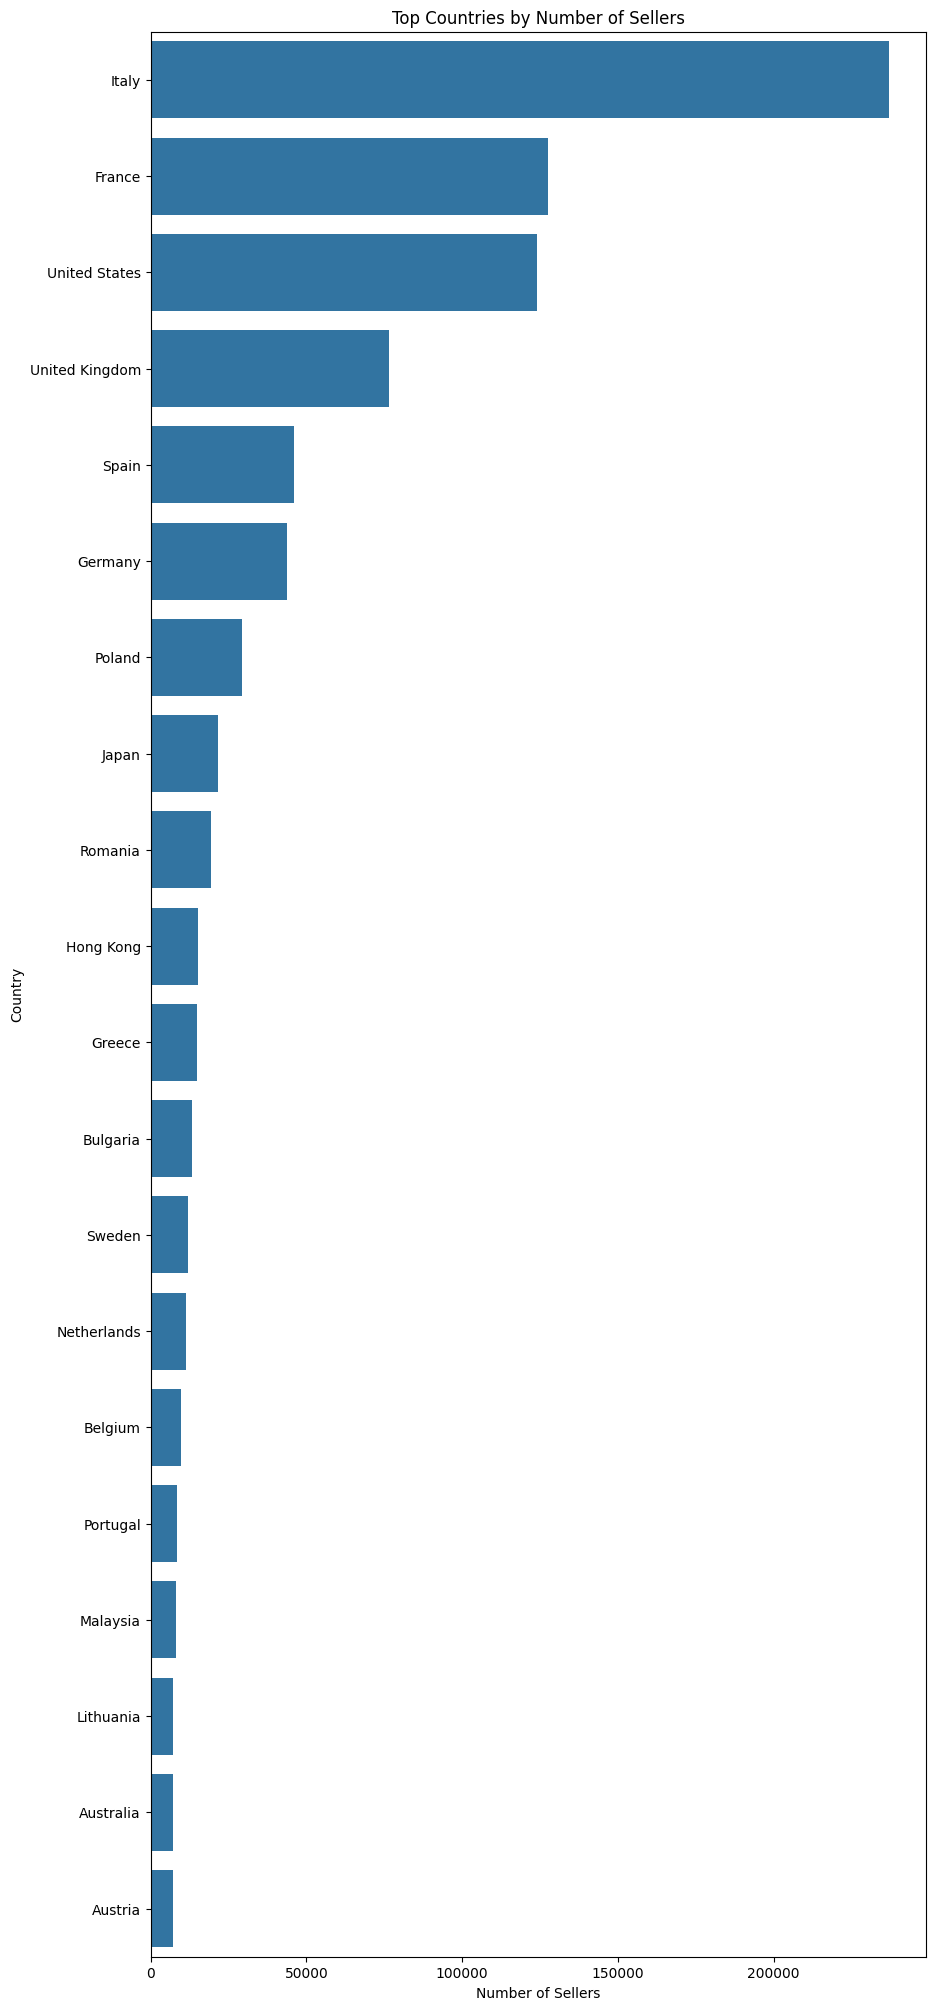

In [20]:
top_countries = v1["seller_country"].value_counts().head(20)
plt.figure(figsize=(10, 25))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top Countries by Number of Sellers")
plt.xlabel("Number of Sellers")
plt.ylabel("Country")
plt.show()

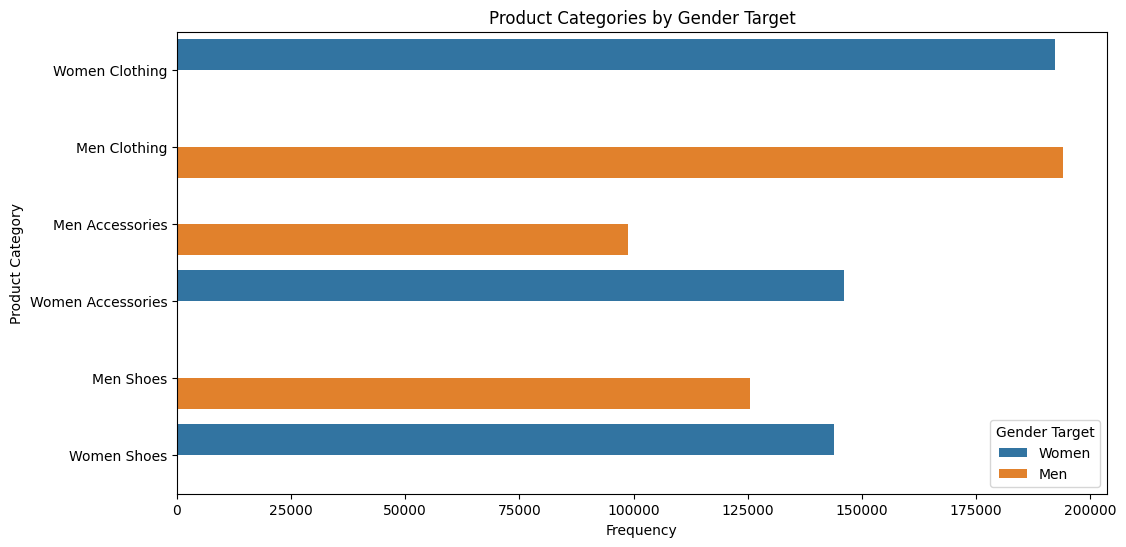

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(
    y="product_category",
    hue="product_gender_target",
    data=v1,
)
plt.title("Product Categories by Gender Target")
plt.xlabel("Frequency")
plt.ylabel("Product Category")
plt.legend(title="Gender Target")
plt.show()


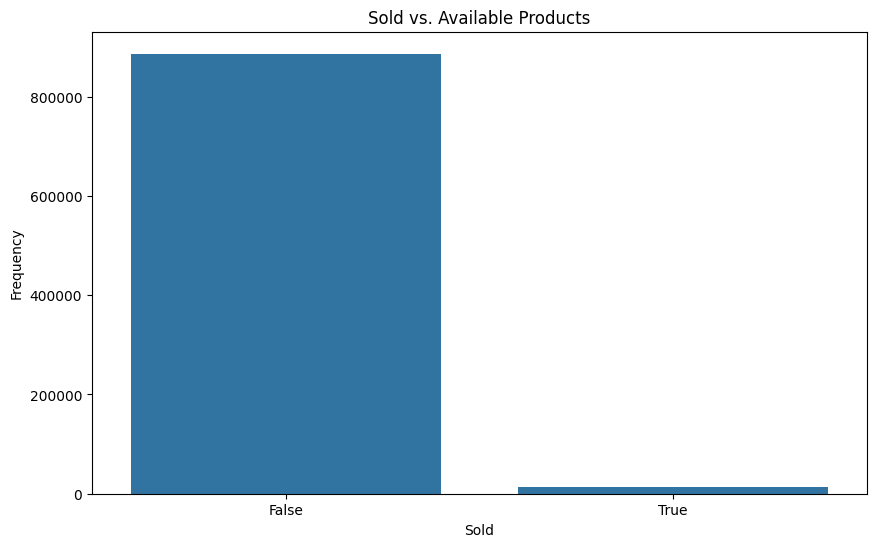

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x="sold", data=v1)
plt.title("Sold vs. Available Products")
plt.xlabel("Sold")
plt.ylabel("Frequency")
plt.show()


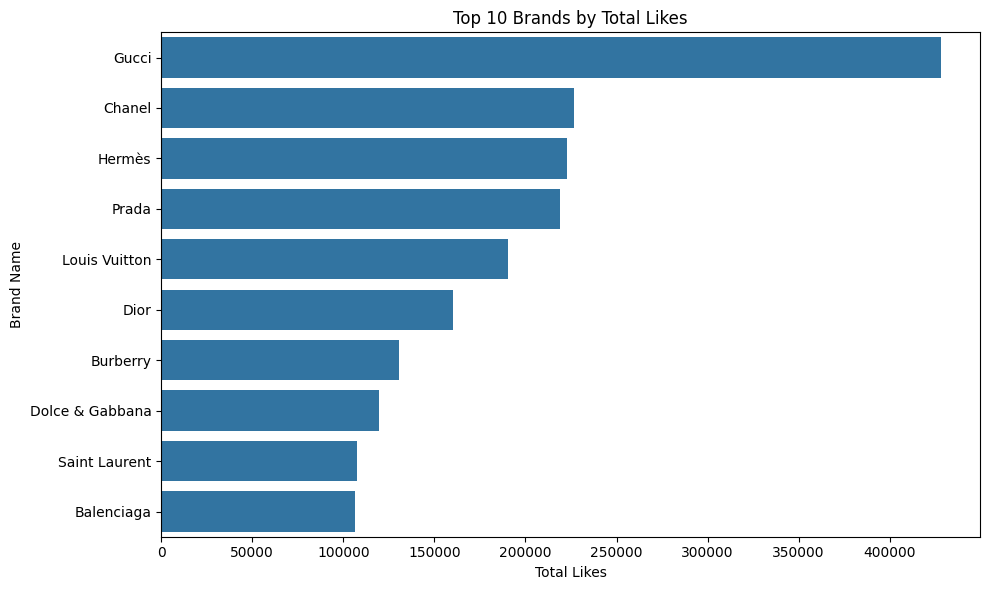

In [23]:
likes_per_brand = v1.groupby("brand_name")["product_like_count"].sum().reset_index()
likes_per_brand = likes_per_brand.sort_values(by="product_like_count", ascending=False)
top_10_brands_by_likes = likes_per_brand.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="product_like_count",
    y="brand_name",
    data=top_10_brands_by_likes,
)
plt.title("Top 10 Brands by Total Likes")
plt.xlabel("Total Likes")
plt.ylabel("Brand Name")
plt.tight_layout()
plt.show()
